In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.layers import BatchNormalization



import warnings
warnings.filterwarnings('ignore')
import tensorflow_addons as tfa


In [2]:
import pathlib
data_dir = pathlib.Path('/Users/alfahwun/Documents/faces')


In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

3596


In [4]:
img_height = 64
img_width = 64

In [5]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width))


Found 3595 files belonging to 2 classes.
Using 2876 files for training.
Using 719 files for validation.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-07 14:02:32.669095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 14:02:32.669127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
class_names = train_ds.class_names
print(class_names)

['angry', 'smiling']


In [7]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
model = Sequential()
model.add(Conv2D(8, (3, 3), 1, activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15


2023-03-07 14:02:38.327589: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-07 14:02:38.709081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - ETA: 0s - loss: 0.5713 - accuracy: 0.7131

2023-03-07 14:02:43.528309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 6s 34ms/step - loss: 0.5713 - accuracy: 0.7131 - val_loss: 0.5049 - val_accuracy: 0.7747
Epoch 2/15
90/90 [==============================] - 2s 23ms/step - loss: 0.4453 - accuracy: 0.7907 - val_loss: 0.4614 - val_accuracy: 0.7844
Epoch 3/15
90/90 [==============================] - 2s 24ms/step - loss: 0.3777 - accuracy: 0.8241 - val_loss: 0.3278 - val_accuracy: 0.8512
Epoch 4/15
90/90 [==============================] - 2s 23ms/step - loss: 0.3391 - accuracy: 0.8533 - val_loss: 0.3120 - val_accuracy: 0.8512
Epoch 5/15
90/90 [==============================] - 2s 24ms/step - loss: 0.2981 - accuracy: 0.8731 - val_loss: 0.2810 - val_accuracy: 0.8734
Epoch 6/15
90/90 [==============================] - 2s 23ms/step - loss: 0.2622 - accuracy: 0.8877 - val_loss: 0.3011 - val_accuracy: 0.8707
Epoch 7/15
90/90 [==============================] - 2s 22ms/step - loss: 0.2242 - accuracy: 0.9040 - val_loss: 0.2445 - val_accuracy: 0.8985
Epoch 8/15
90/90 [======

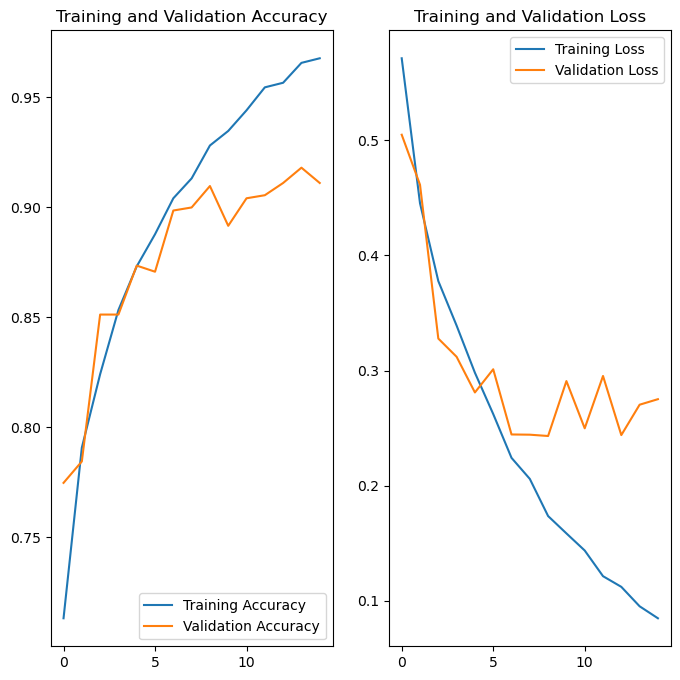

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [11]:
img = tf.keras.utils.load_img(
    "/Users/alfahwun/Downloads/angrytest1.png", target_size=(img_height, img_width)
)
resize = tf.image.resize(img, (64,64))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 161ms/step


2023-03-07 14:03:21.402297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [12]:
if yhat > 0.5: 
    print(f'Predicted class is smiling')
else:
    print(f'Predicted class is angry')

Predicted class is angry
